In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential # CNN
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

import cv2
import os

from tqdm import tqdm

import warnings

from config import DATASET_PATH

warnings.filterwarnings('ignore')

In [2]:
# load data

# via : https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data

labels = ['NORMAL','PNEUMONIA']
img_size = 150 # 150*150px


In [3]:
def get_data(data_dir):
    data = list()
    
    for label in labels:
        path = os.path.join(data_dir, label)
        class_id = labels.index(label) # 'PNEU' = 0, 'NORM' = 1
              
        for img_name in tqdm(os.listdir(path)):
            
            try:
                # read image
                img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
                
                if img is None:
                    print("image can not be read")
                    continue
                
                # resize img
                resized_img =  cv2.resize(img, (img_size, img_size))    
                
                data.append([resized_img, class_id]) 
            
            except Exception as e:
                print(e)
    
    return np.array(data, dtype = 'object')            
        
    

In [4]:
get_path = lambda x : os.path.join(DATASET_PATH, x)

In [5]:
train = get_data(get_path('train'))

100%|██████████| 3875/3875 [00:19<00:00, 197.65it/s]


In [6]:
test = get_data(get_path('test'))

100%|██████████| 390/390 [00:01<00:00, 208.44it/s]


In [7]:
val = get_data(get_path('val'))

100%|██████████| 8/8 [00:00<00:00, 190.87it/s]


In [8]:
print(f"train : {train.shape}\ntest : {test.shape}\nval : {val.shape}")

train : (5216, 2)
test : (624, 2)
val : (16, 2)


<Axes: ylabel='count'>

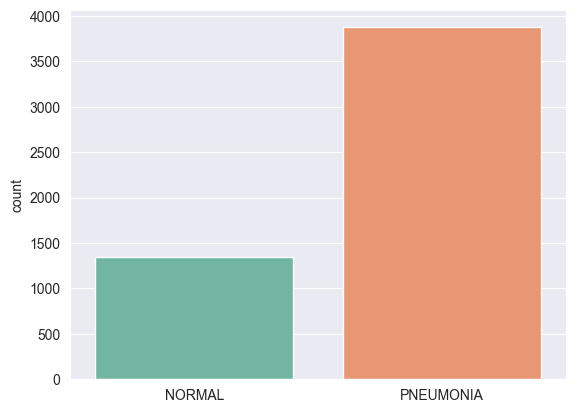

In [9]:
# data visualizition and preproccessing
l = ['NORMAL' if i[1] == 0 else 'PNEUMONIA' for i in train]

sns.countplot(x=l,palette='Set2')


In [10]:
x_train, y_train = list(), list()
x_test, y_test = list(), list()
x_val, y_val = list(), list()

for feat, label in train:
    x_train.append(feat)
    y_train.append(label)

In [11]:
for feat, label in test:
    x_test.append(feat)
    y_test.append(label)

In [12]:
for feat, label in val:
    x_val.append(feat)
    y_val.append(label)

Text(0.5, 1.0, 'NORMAL')

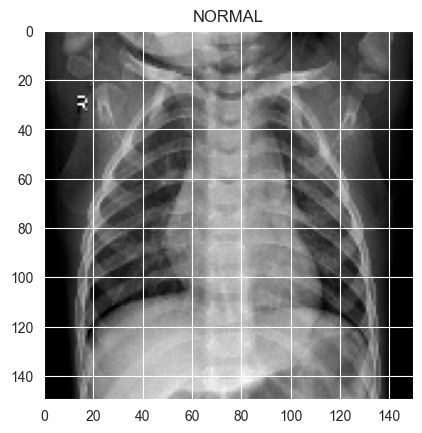

In [14]:
# visualization
plt.figure()
idx = 1
plt.imshow(train[idx][0], cmap='gray')
plt.title(labels[train[idx][1]])

Text(0.5, 1.0, 'PNEUMONIA')

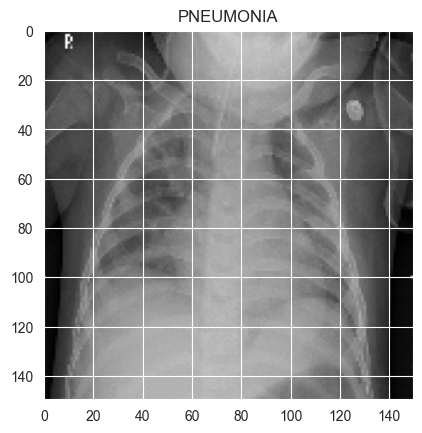

In [15]:
plt.figure()
idx = -idx
plt.imshow(train[idx][0], cmap='gray')
plt.title(labels[train[idx][1]])

In [16]:
# normalization : [0,255] -> [0,1]

x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
x_val = np.array(x_val) / 255



In [19]:
x_train.shape
# (5216,150,150) ->(5216,150,150,1) reshape
x_train = x_train.reshape(-1, img_size, img_size, 1) # -1 : oto # 5216
x_test = x_test.reshape(-1, img_size, img_size, 1)
x_val = x_val.reshape(-1, img_size, img_size, 1)


In [20]:
x_train.shape

(5216, 150, 150, 1)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)